In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['HA_measurements', 'HA_station']

In [4]:
Measurement = Base.classes.HA_measurements
Station = Base.classes.HA_station

In [5]:
session = Session(engine)

In [7]:
# Design a query to retrieve the last 12 months of precipitation data.

# Calculating date
year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year)

# Query
percip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year).all()

# dataframe
percip_df = pd.DataFrame(percip_data, columns=['date', 'precipitation'])
percip_df.set_index(percip_df['date'], inplace=True)
percip_df.head()

2016-08-23


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


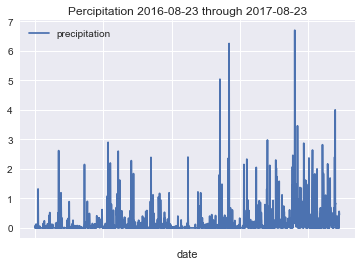

In [8]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_df.plot(title="Percipitation 2016-08-23 through 2017-08-23")
plt.show()

In [9]:
percip_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [10]:
#Design a query to calculate the total number of stations.
session.query(func.count(Station.station)).all()

[(9)]

In [26]:
#Design a query to find the most active stations.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity
# USC00519281 is the most active station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

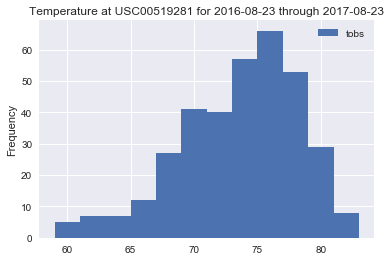

In [36]:
temp_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year).all()
temp_df = pd.DataFrame(temp_data, columns=['tobs'])
temp_plot = temp_df.plot(kind="hist", bins=12, title="Temperature at USC00519281 for 2016-08-23 through 2017-08-23")
plt.show(temp_plot)

In [48]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.

# trip dates are September 8, 2016 to September 18, 2016

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()

min_ave_max = calc_temps('2016-09-08', '2016-09-18')
print(min_ave_max)

[(71.0, 77.3157894736842, 83.0)]


In [58]:
columns = ["min", "ave", "max"]
trip_df = pd.DataFrame(min_ave_max, columns=columns)
trip_df.head()

,min,ave,max
0,71.0,77.315789,83.0


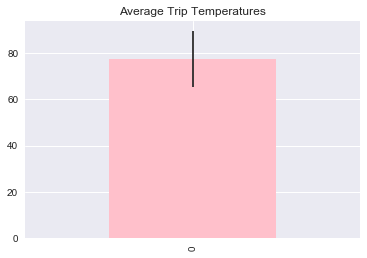

In [68]:
# barplot
trip_df["ave"].plot(kind="bar", yerr=yerr, color="pink", title="Average Trip Temperatures")
yerr = temp_df["max"]-temp_df["min"]